# Центральная предельная теорема своими руками

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## Экспоненциальное распределение

Экспоненциальное распределение — абсолютно непрерывное распределение, моделирующее время между двумя последовательными свершениями одного и того же события.

Математическое ожидание: $ E[x] = \frac{1}{\lambda} $, где $ \lambda $ - параметр, характеризующий среднее число событий за единицу времени.

Дисперсия: $ D[x] = \frac{1}{\lambda^2} $.

В расчётах используется стандартное значение параметра $ \lambda = 1 $, таким образом математическое ожидание и дисперсия такого экспоненциального распределения равны:

$ E[x] = 1 $

$ D[x] = 1 $

In [10]:
#генерируем выборку
exponent_sts = sts.expon(scale = 1) #задаём экспоненциальное распределение с параметром равным 1
sample = exponent_sts.rvs(1000) #генерируем выборку объёма 1000

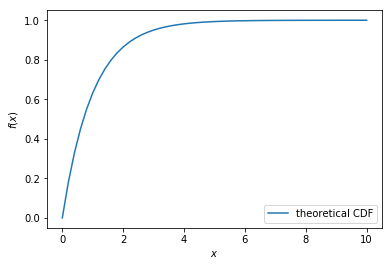

In [21]:
x = np.linspace(0, 10, 51) #определяем массив точек для построения функции распределения
cdf = exponent_sts.cdf(x) #вычисляем значения функции распределения от выборки
#строим теоретическую функцию распределения
plt.plot(x, cdf, label='theoretical CDF') 
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()

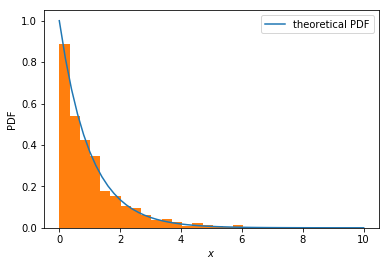

In [20]:
x = np.linspace(0, 10, 51) #определяем массив точек для построения плотности распределения
pdf = exponent_sts.pdf(x) #вычисляем значения плотности распределения от выборки
#строим гистрограмму выборки и теоретическую функцию распределения
plt.plot(x, pdf, label='theoretical PDF') 
plt.hist(sample, bins=20, normed=True)
plt.ylabel('PDF')
plt.xlabel('$x$')
plt.legend()

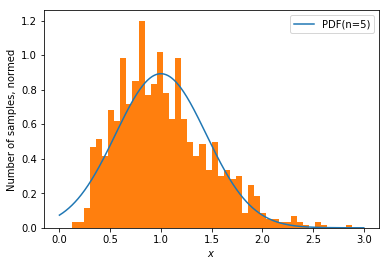

In [13]:
n = 5
sample5 = np.array([]) #обозначим массив выборочных средних
i = 0
while i <= 1000: #цикл генерации случайных выборок количества n из функции распределения
    sample5i = exponent_sts.rvs(n) #генерация выборки требуемого объёма
    mean5 = sample5i.mean() #определение выборочного среднего (в.с.)
    sample5 = np.append(sample5, mean5) #добавляем в массив новое значение в.с.
    i += 1

#определим параметры нормального распределения описывающие массив 1000 в.с. при n=5
E = 1. #среднее экспоненциального распределения
D = 1. #дисперсия экспоненциального распределения
D5 = D/n #выборочная дисперсия для нормального распределения приближающего выборку средних
sigma5 = np.sqrt(D5) #сигма для нормального распределения выборки средних
norm5 = sts.norm(E, sigma5) #определяем нормальное распределение с расчетными характеристиками экспоненциального распределения

x = np.linspace(0, 3, 1000) #определяем массив точек для построения плотности распределения
pdf = norm5.pdf(x) #получаем плотность распределения

#строим гистограмму массива средних при n=5 и плотность описывающую этот массив нормального распределения
plt.plot(x, pdf, label="PDF(n=5)")
plt.hist(sample5, bins=50, range = (0, 3), normed=True)
plt.ylabel('Number of samples, normed')
plt.xlabel('$x$')
plt.legend()
plt.show

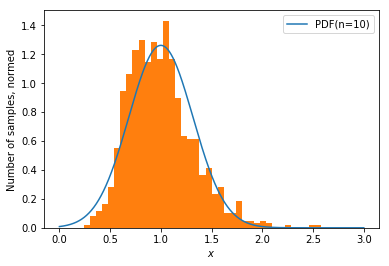

In [14]:
n = 10
sample10 = np.array([])
i = 0
while i <= 1000:
    sample10i = exponent_sts.rvs(n)
    mean10 = sample10i.mean()
    sample10 = np.append(sample10, mean10)
    i += 1
    
#определим параметры нормального распределения описывающие массив 1000 в.с. при n=10
E = 1.
D = 1.
D10 = D/n
sigma10 = np.sqrt(D10)
norm10 = sts.norm(E, sigma10)

x = np.linspace(0, 3, 1000)
pdf = norm10.pdf(x)

#строим гистограмму массива средних при n=10 и плотность описывающую этот массив нормального распределения
plt.plot(x, pdf, label="PDF(n=10)")
plt.hist(sample10, bins=50, range = (0, 3), normed=True)
plt.ylabel('Number of samples, normed')
plt.xlabel('$x$')
plt.legend()

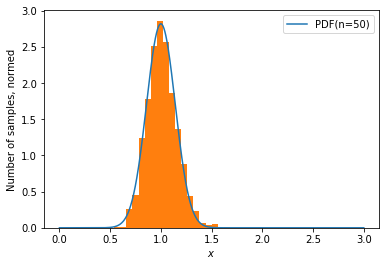

In [22]:
n = 50
sample50 = np.array([])
i = 0
while i <= 1000:
    sample50i = exponent_sts.rvs(n)
    mean50 = sample50i.mean()
    sample50 = np.append(sample50, mean50)
    i += 1

#определим параметры нормального распределения описывающие массив 1000 в.с. при n=50
E = 1.
D = 1.
D50 = D/n
sigma50 = np.sqrt(D50)
norm50 = sts.norm(E, sigma50)

x = np.linspace(0, 3, 1000)
pdf = norm50.pdf(x)

#строим гистограмму массива средних при n=10 и плотность описывающую этот массив нормального распределения
plt.plot(x, pdf, label="PDF(n=50)")
plt.hist(sample50, bins=50, range = (0, 3), normed=True)
plt.ylabel('Number of samples, normed')
plt.xlabel('$x$')
plt.legend()

В качестве вывода можно сказать следующее: по построенным графикам хорошо видно, что с ростом количества элементов в одной выборке (n) из заданного распределения увеличивается и качество аппроксимации соответствующим нормальным распределением распределения случайной величины, составленной из выборочных средних.